In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import ast

In [2]:
## Matplotlib defaults

plt.style.use("default")

plt.rcParams.update({"font.size" : 22})

# Positive Results Figure

Strongly significant reasons for MA increases:
- Assignees
- Classifications

## Assignees

In [3]:
results_df = pd.read_csv("../Data/Patents/patent_MA_results_incomplete.csv")

100%|██████████| 833/833 [01:16<00:00, 10.85it/s]


Text(0, 0.5, 'Patents')

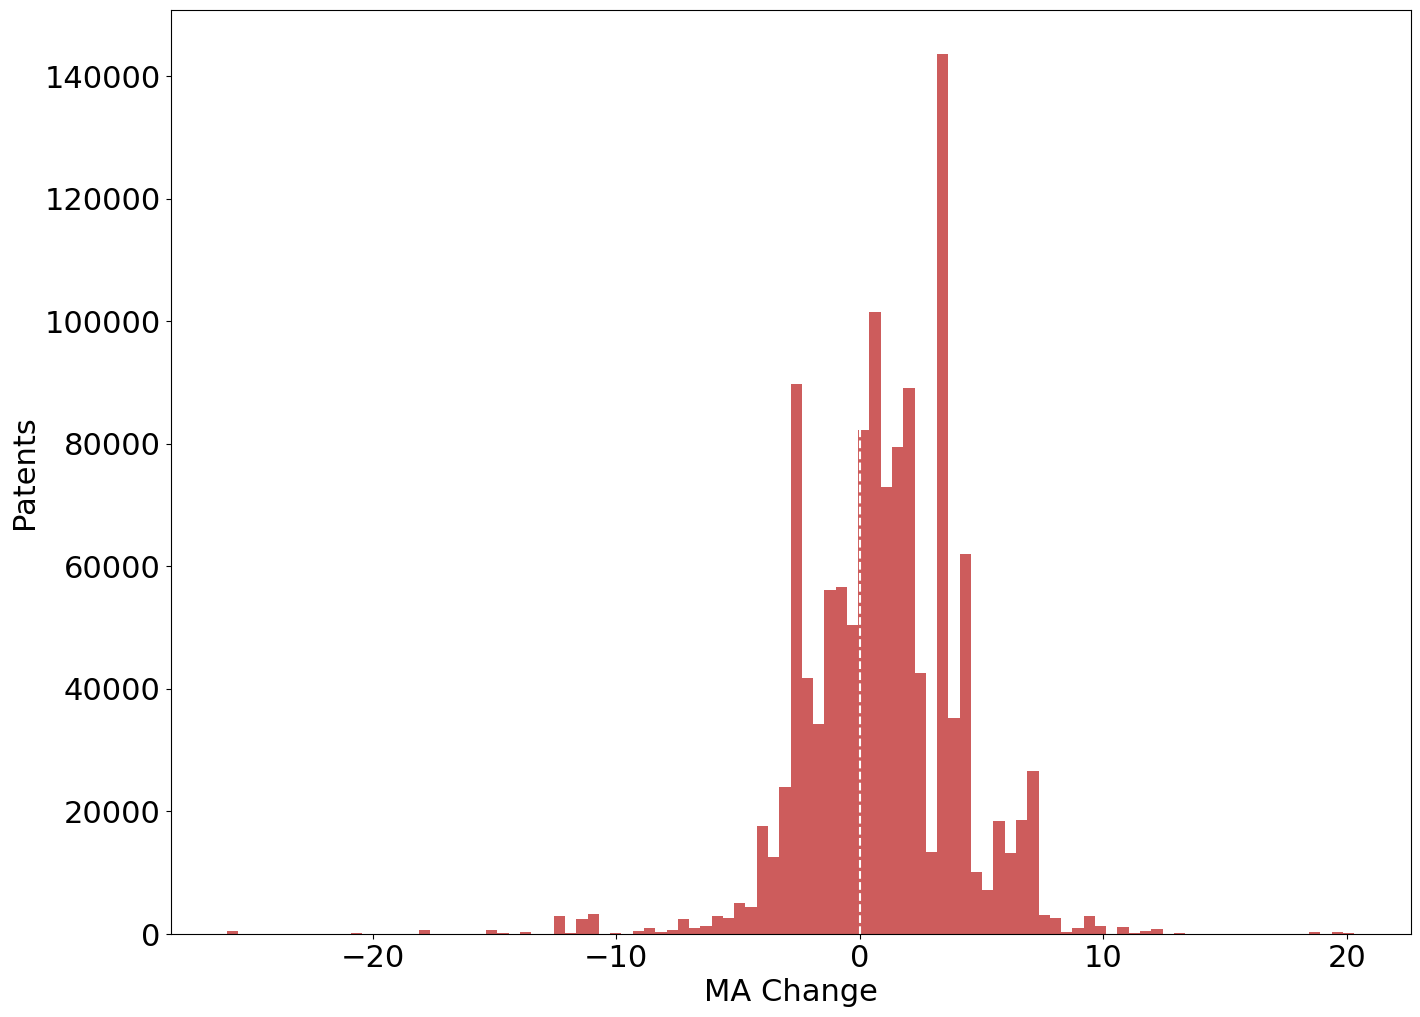

In [15]:
#Alternative graphing (finding slope change in MA)
linear_regressor = LinearRegression()

assignee_MA_slopes = []
counts = []

for assignee in tqdm(list(results_df["assignees"].unique())):
    sub_df = results_df[results_df["assignees"] == assignee]
    if len(sub_df) > 10:

        X = sub_df["date_ordinal"].values.reshape(-1,1)
        Y = sub_df["MA_avg"].values.reshape(-1,1)
        try:
            reg = linear_regressor.fit(X, Y)
            Y_pred = linear_regressor.predict(X)

            #Calculate deltaMA (change in MA of linear regression, taking into consideration negative slopes)
            assignee_MA_slopes.extend([reg.coef_[0][0] * (max(X) - min(X))[0]]*len(sub_df))
                        
        except ValueError as e:
            pass

plt.figure(figsize=(16,12))


plt.hist(assignee_MA_slopes, bins=100, histtype="bar", color="indianred")
plt.axvline(x=0, ymin=0, ymax=70, color="white", linestyle="--")
plt.xlabel("MA Change")
plt.ylabel("Patents")
# plt.title("Average MA changes - Assignees", color="indianred")


## Classification

In [6]:
def classification_to_list(classification):
    try:
        return ast.literal_eval(classification)
    except ValueError:
        return []
    except SyntaxError:
        return classification.strip('][').split(',')

In [9]:
tqdm.pandas()

results_df["classification"] = results_df["classification"].progress_apply(classification_to_list)

100%|██████████| 186243/186243 [00:06<00:00, 27127.68it/s]


In [10]:
#Explode classifications
results_df = results_df.explode("classification")

In [11]:
## Remove backslash and two numbers after it (and put them in a different column, in case they are useful later...)
def filter_classification(classification):
    try:
        return classification.split("/")[0]
    except AttributeError:
        return ""

In [12]:
tqdm.pandas()

results_df["filtered_classification"] = results_df["classification"].progress_apply(filter_classification)

print(results_df)

100%|██████████| 1246099/1246099 [00:03<00:00, 411453.14it/s]

        Unnamed: 0  Unnamed: 0.1              ID            author  \
0                0           276  US-10034442-B2  AARDEN HARRIETTE   
0                0           276  US-10034442-B2  AARDEN HARRIETTE   
0                0           276  US-10034442-B2  AARDEN HARRIETTE   
0                0           276  US-10034442-B2  AARDEN HARRIETTE   
1               10           277  US-10034442-B2           BAR AMI   
...            ...           ...             ...               ...   
186241     4149568        907681   US-9751966-B2    ZWEIG ANDREW M   
186241     4149568        907681   US-9751966-B2    ZWEIG ANDREW M   
186241     4149568        907681   US-9751966-B2    ZWEIG ANDREW M   
186242     4149569        907682    US-4914171-A    ZWEIG ANDREW M   
186242     4149569        907682    US-4914171-A    ZWEIG ANDREW M   

                          assignees  \
0       SEMINIS_VEGETABLE_SEEDS_INC   
0       SEMINIS_VEGETABLE_SEEDS_INC   
0       SEMINIS_VEGETABLE_SEEDS_INC   
0  

100%|██████████| 2923/2923 [04:40<00:00, 10.43it/s]


Text(0, 0.5, 'Count')

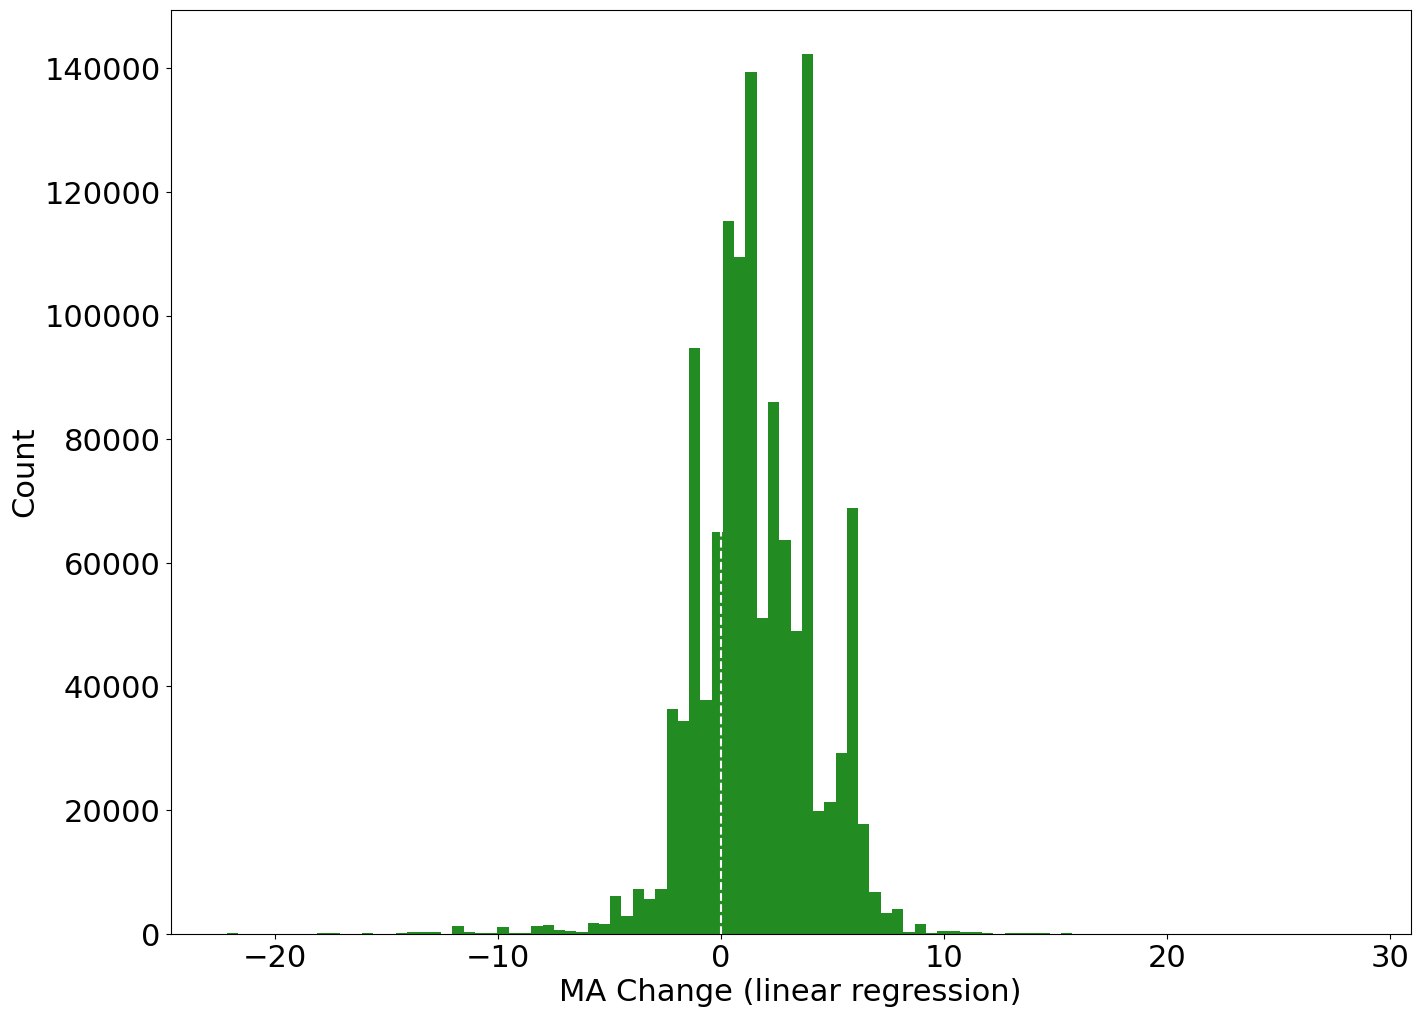

In [16]:
#Alternative graphing (finding slope change in MA)
linear_regressor = LinearRegression()

classification_MA_slopes = []

for c in tqdm(list(results_df["filtered_classification"].unique())):
    sub_df = results_df[results_df["filtered_classification"] == c]
    if len(sub_df) > 10:

        X = sub_df["date_ordinal"].values.reshape(-1,1)
        Y = sub_df["MA_avg"].values.reshape(-1,1)
        try:
            reg = linear_regressor.fit(X, Y)
            Y_pred = linear_regressor.predict(X)

            #Calculate deltaMA (change in MA of linear regression, taking into consideration negative slopes)
            classification_MA_slopes.extend([reg.coef_[0][0] * (max(X) - min(X))[0]]*len(sub_df))
                        
        except ValueError as e:
            pass

plt.figure(figsize=(16,12))


plt.hist(classification_MA_slopes, bins=100, color="forestgreen")
plt.axvline(x=0, ymin=0, ymax=70, color="white", linestyle="--")
plt.xlabel("MA Change (linear regression)", fontsize=22)
plt.ylabel("Count", fontsize=22)


## Full Figure

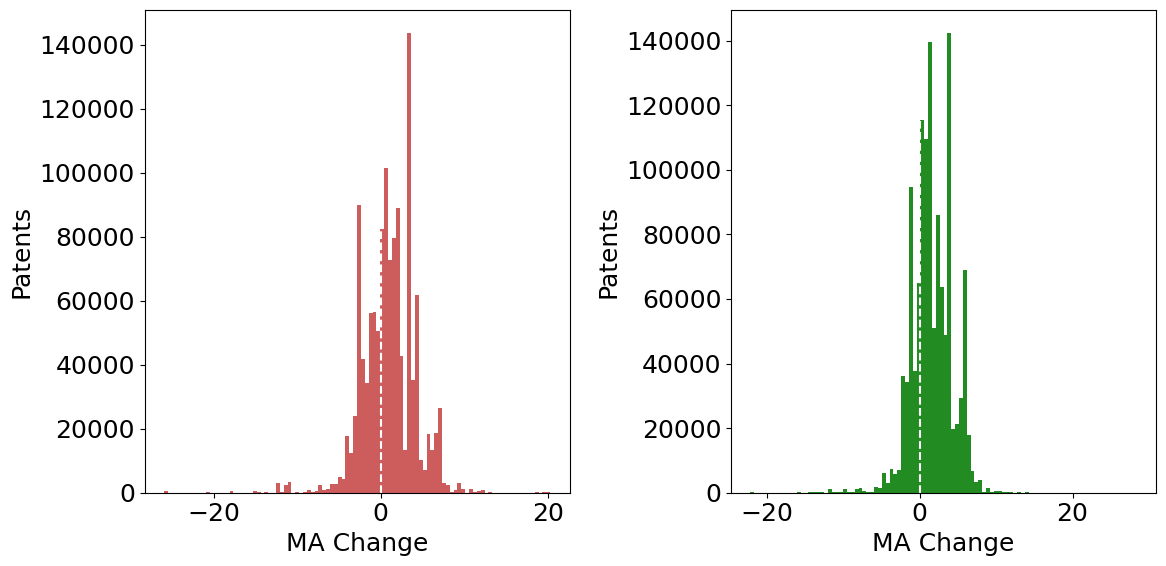

In [18]:
import matplotlib.gridspec as gridspec
plt.rcParams.update({"font.size" : 18})

gs = gridspec.GridSpec(1,2)

plt.figure(figsize=(12,6))


### Assignees
ax1 = plt.subplot(gs[0,0])
ax1.hist(assignee_MA_slopes, bins=100, color="indianred")
ax1.axvline(x=0, ymin=0, ymax=70, color="white", linestyle="--")
ax1.set_xlabel("MA Change")
ax1.set_ylabel("Patents")

### Classifications
ax2 = plt.subplot(gs[0,1])
ax2.hist(classification_MA_slopes, bins=100, color="forestgreen")
ax2.axvline(x=0, ymin=0, ymax=70, color="white", linestyle="--")
ax2.set_xlabel("MA Change")
ax2.set_ylabel("Patents")

plt.tight_layout()

